Title: Dependent Samples t-tests
Slug: dependent-samples-t-test
Summary: Simple example in Python using NumPy and SciPy to walk through steps of dependent samples t-tests 
Date: 2019-2-21 18:05  
Category: Math
Subcategory: Inferential Statistics
PostType: Tutorial
Keywords: dependent samples t-test python
Tags: t-tests, python, scipy, numpy
Authors: Dan Friedman

Dependent t-tests are considered within subject designs. This means the same subject may take a test twice. They are also called **paired samples t-tests**.

In order to fully grasp the concepts in this post, it'll help to have familiarity with the following concepts: z-tests, hypothesis testing, p-values, normal distribution, standard deviation, standard error and the central limit theorem.

The purpose of this test is typically to determine if the difference between sample means is *significantly* different from zero or another value.

Categories of this include:

- Repeated measures design
    - Example: measure same people's errors on typing on laptop keyboard and then mobile keyboard for a specified blob of text in a specified time duration
- Pre-test and post-test: measure variable at one point in time, then provide a treatment and the measure that same variable
    - Example: measure average hours of sleeps for patients normally, then have them use a sleeping pill and measure average hours of sleep 
- Longitudinal: repeated observations of a sample over a period of time
    - Example: measure growth or decline of count of rides in bike share service over time

### Data Requirements for Dependent Sample t-tests

- Each of the samples have a dependent variable that is continuous.
- The subjects in each sample are the same (example - same people tested in both samples).
- Randomly chosen test subjects from each sample of a greater population.
- Approximate normal distribution of the differences between the paired values.
- No outliers in the difference between the two samples observations.

### Setup Code

#### Import Modules

In [27]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### Set Visualization Style

In [28]:
sns.set_context('talk')
sns.set_style("darkgrid")

### Steps to Perform Dependent Sample t-test

1) Setup the experiment to record measurements from two samples.

2) Set an alpha level for the test, a null hypothesis and alternative hypothesis.

3) Run the experiment and collect the data.

4) Determine if data meets requirements to perform a dependent sample t-test.

5) Calculate the t-critical value.

6) Calculate the t-statistic.

7) Compare the t-statistic to the t-critical value. Interpret results of the experiment based on the original hypotheses.

### 1) Setup Experiment to Follow Initial Data Requirements

Let's assume the participants of this study were randomly chosen from the general population of people. 

This is the same example mentioned earlier.

A sample of 19 people were told to lie in bed ready to fall asleep at 10pm every night and would be woken up by an alarm at 6:30am. They'd perform this test for 15 days days in a row. A calculation of the average number of hours slept by each person was recorded. That same test was performed for the same 19 people at a later point in time with the only difference being that each participant took a sleeping pill at 9:30pm. This is considered a pretest posttest type of t-test for dependent samples.

The variable being measured, hours of sleep, is a continuous variable.

### 2) Set an Alpha Level and Original Hypotheses

The alpha level will be $0.05$. 

In [29]:
alpha = 0.05

Does the sleeping pill help *significantly* increase the average hours slept compared to without the sleeping pill for the subjects? 

- $H_{o}$: $\mu_{pill}<=\mu_{no\:pill}$
- $H_{A}$: $\mu_{pill}>\mu_{no\:pill}$

This is a positive one-directional sided test.

Note how the symbols above use $\mu$ instead of $\bar{x}$. The dependent samples t-test is utilized to infer the relevant population parameters based on the sample data. 

### 3) Collect the Data

In [30]:
avg_sleep_no_pill = np.array([6.5, 6.8, 8.1, 8.02, 7.5, 7.6, 7.8, 7.9, 7.2, 7.4, 7.1, 7.6, 7.3, 6.9, 6.1, 5.95, 6.8, 6.95, 8.05])
avg_sleep_pill = np.array([6.55, 7.01, 8.18, 8.16, 7.7, 7.64, 7.95, 8.21, 7.51, 7.54, 7.40, 8.04, 7.74, 7.28, 6.51, 6, 7.01, 6.95, 8.14])

### 4) Determine if Data Meets Requirements to Perform a Dependent Sample t-test

Below, I subtract the values from `avg_sleep_no_pill` from `avg_sleep_pill` to get a numpy array of the difference values.

In [31]:
sleep_difference_patient_averages_from_treatment = np.subtract(avg_sleep_pill, avg_sleep_no_pill)
sleep_difference_patient_averages_from_treatment

array([0.05, 0.21, 0.08, 0.14, 0.2 , 0.04, 0.15, 0.31, 0.31, 0.14, 0.3 ,
       0.44, 0.44, 0.38, 0.41, 0.05, 0.21, 0.  , 0.09])

Below is a box plot to visualize the distribution of values in `sleep_difference_patient_averages_from_treatment`. This visualization indicates there are no outliers.

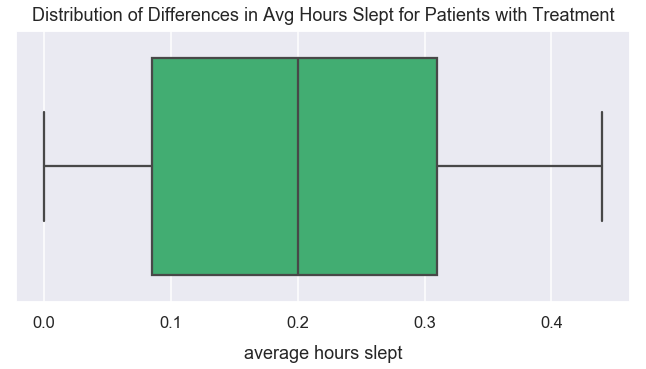

In [32]:
plt.figure(figsize=(11, 5))
sns.boxplot(sleep_difference_patient_averages_from_treatment, color='mediumseagreen', saturation=0.9)
plt.title("Distribution of Differences in Avg Hours Slept for Patients with Treatment", y=1.015)
plt.xlabel("average hours slept", labelpad=14);

Below is a histogram to illustrate the distribution of values in `sleep_difference_patient_averages_from_treatment`. This distribution resembles an approximate normal distribution. The values are centered around a central value around $0.18$ hours and there is approximately symmetry around this center.

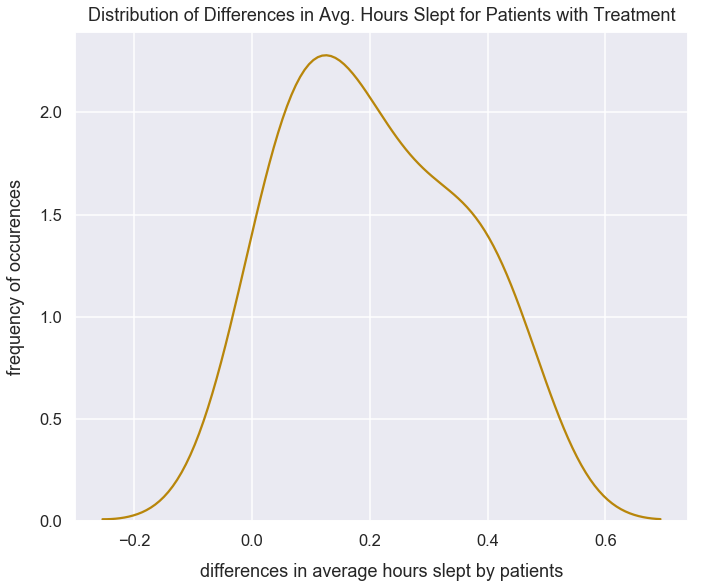

In [33]:
plt.figure(figsize=(11, 9))
sns.distplot(sleep_difference_patient_averages_from_treatment, hist=False, color='darkgoldenrod')
plt.title("Distribution of Differences in Avg. Hours Slept for Patients with Treatment", y=1.01, fontsize=18)
plt.xlabel("differences in average hours slept by patients", labelpad=14)
plt.ylabel("frequency of occurences", labelpad=14);

### 5) Calculate t-critical Value

This is a positive one-directional t-test and we want to determine if the differences in hours slept by patients after the treatment compared to before the treatment is *significantly* greater. The t-critical value should be positive. With an alpha level of $0.05$, there should be $0.95$ area under the curve to the left of the t-critical value for the t-distribution. 

In [34]:
n = len(avg_sleep_no_pill)
probability_auc_left_tail = 1 - alpha
probability_auc_left_tail

0.95

For the sample size of $n=19$, the degrees of freedom is $19-1 = 18$

In [35]:
degrees_of_freedom = n - 1
print("degrees of freedom: {0}".format(degrees_of_freedom))

degrees of freedom: 18


Use the `ppf()` method to calculate the t-critical value. Set the argument:

- `q` to be the area under the curve of $0.95$ that's to the left of the t-critical value
- `df` to be our `degrees_of_freedom` value of $18$

In [43]:
t_critical_value =round(t.ppf(q=probability_auc_left_tail, df=degrees_of_freedom), 2)
print("t-critical value of {0}".format(t_critical_value))

t-critical value of 1.73


### 6) Calculate the t-statistic

Scipy stat's `ttest_rel()` <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html'>method</a> is used for t-tests on two *related* samples of scores. 

This method returns the probability for a two-sided test. The returned t-statistic is the same for a one-tail or two-tail dependent sample t-test.

In [37]:
sleep_t_test_results = stats.ttest_rel(avg_sleep_pill, avg_sleep_no_pill)
sleep_t_test_results

Ttest_relResult(statistic=6.3059575538645145, pvalue=6.059618861726903e-06)

Also, I can calculate the t-statistic for a dependent t-test using the formula below:

$$t=\frac{\bar{x}_{D}-0}{\frac{s}{\sqrt{n}}}$$

We're looking to see if the differences in sample means is different than $0$. We could replace that value $0$ for any other numerical value.

- $\bar{x}_{D}$ is the difference in sample means for the two groups and is considered our point estimate
- $\frac{s}{\sqrt{n}}$ is our estimated standard error from a sampling distribution (that consists of sample means based on taking repeated samples from a greater population, calculating the differences in observations and then the sample mean of the differences) 
- $s$ is the sample standard deviation of the differences (remember to use bessel's correction with $n-1$ in the denominator)
- $n$ is sample size

Our point estimate is $\bar{x}_{pill} - \bar{x}_{no\:pill}$

We're trying to determine if this point estimate is significantly different from $0$.

In [38]:
mean_point_estimate = np.mean(avg_sleep_pill) - np.mean(avg_sleep_no_pill)
mean_point_estimate

0.20789473684210424

Use the `std()` <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html'>method</a> in NumPy and set the argument `ddof` to be $1$ since this is a calculation for the *sample* standard deviation.

In [39]:
std_dev_sleep_difference_patient_averages_from_treatment = np.std(sleep_difference_patient_averages_from_treatment, ddof=1)
std_dev_sleep_difference_patient_averages_from_treatment

0.14370413074432642

In [40]:
t_statistic = mean_point_estimate/(std_dev_sleep_difference_patient_averages_from_treatment/np.sqrt(n))
t_statistic

6.305957553864484

The t-statistic returned from `ttest_rel()` is the same as the t-statstic from utilizing the equation above.

### 7) Interpret Results

The returned t-statistic of $6.31$ is greater than the t-critical value of $1.73$. Additionally, the p-value of $6.06e^{-6}$ is much smaller than the alpha level of $0.05$.

Therefore, it is statistically unlikely we'd see such large differences in average hours of sleep with the sleeping pill treatment compared to no pill due to chance. We have sufficient evidence to reject the null hypothesis. Study participants had *significantly* more sleep when using the sleeping pill.